# 神经网络(Neural NetWork)模型的搭建(nn.Module的使用)

In [19]:
#导入库
import torch.nn as nn
import torch
import torch.nn.functional as F
from torch.utils.tensorboard import SummaryWriter

In [3]:
#简单神经网络搭建测试
class Network(nn.Module):
    def __init__(self):
        super().__init__()
    def forward(self,input):
        output = input**2
        return output
    
network = Network()
x = torch.tensor(2)
test_result = network(x)
print(test_result)

tensor(4)


## 卷积神经网络中的参数演示
weight为卷积核

stride意义为步进，为卷积核每次移动的距离(可以为单个数字或者元组)

padding默认不进行填充

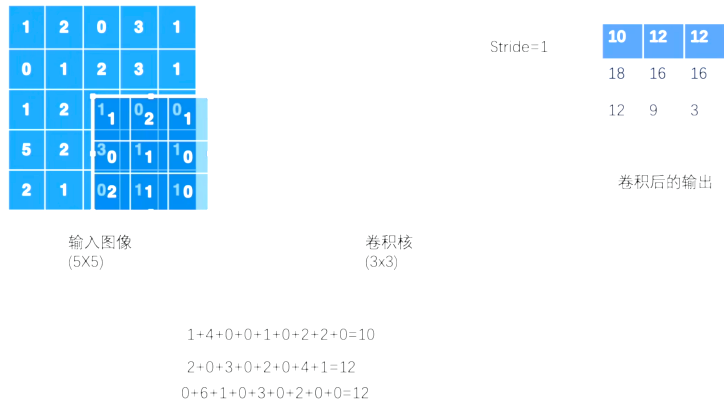

In [1]:
#卷积操作
import torch
input = torch.tensor([[1, 2, 0, 3, 1],
                      [0, 1, 2, 3, 1],
                      [1, 2, 1, 0, 0],
                      [5, 2, 3, 1, 1],
                      [2, 1, 0, 1, 1]])
kernel = torch.tensor([[1, 2, 1],
                       [0, 1, 0],
                       [2, 1, 0]])
print(input.shape)
print(kernel.shape)

torch.Size([5, 5])
torch.Size([3, 3])


In [4]:
# 进行尺寸变换,使输入数据满足尺寸参数要求
input_reshape = torch.reshape(input, (1, 1, 5, 5))
kernel_reshape = torch.reshape(kernel, (1, 1, 3, 3))
print(input_reshape.shape)
print(kernel_reshape.shape)

torch.Size([1, 1, 5, 5])
torch.Size([1, 1, 3, 3])


In [6]:
#测试神经网路输出,步进为1
output = F.conv2d(input_reshape, kernel_reshape, stride=1)
print(output)

tensor([[[[10, 12, 12],
          [18, 16, 16],
          [13,  9,  3]]]])


In [7]:
#步进为2
output2 = F.conv2d(input_reshape, kernel_reshape, stride=2)
print(output2) 

tensor([[[[10, 12],
          [13,  3]]]])


In [8]:
#padding设置，默认不进行填充
output3 = F.conv2d(input_reshape, kernel_reshape, stride=1, padding=1)
print(output3)

tensor([[[[ 1,  3,  4, 10,  8],
          [ 5, 10, 12, 12,  6],
          [ 7, 18, 16, 16,  8],
          [11, 13,  9,  3,  4],
          [14, 13,  9,  7,  4]]]])


使用padding参数进行图像填充,扩充尺寸为1，默认填充值为0

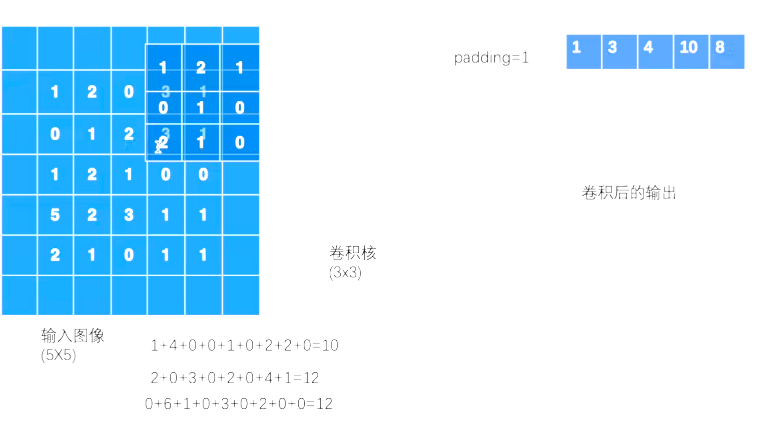

## 神经网络——卷积层
nn.conv1d -- 1维卷积

nn.conv2d -- 2维卷积

In [9]:
import torchvision
from torch.utils.data import DataLoader


dataset = torchvision.datasets.CIFAR10(root="../data", train = False, transform= torchvision.transforms.ToTensor(), download = True)
dataloader = DataLoader(dataset, batch_size=64)

100.0%


Extracting ../data\cifar-10-python.tar.gz to ../data


In [14]:
from torch.nn import Conv2d
class Neural_Network(nn.Module):
    def __init__(self):
        super(Neural_Network, self).__init__()
        self.conv1 = Conv2d(in_channels=3, out_channels=6, kernel_size=3, stride=1, padding=0)
    
    def forward(self, x):
        x = self.conv1(x)
        return x
    
neural_network = Neural_Network()
print(neural_network)
    
    

Neural_Network(
  (conv1): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1))
)


In [22]:
writer = SummaryWriter("neural_network_logs")
step = 0
for data in dataloader:
    imgs, targets = data
    output = neural_network(imgs)
    # print(imgs.shape)
    # print(output.shape)
    writer.add_images(tag="neural_network_input", img_tensor= imgs, global_step= step)
    output = torch.reshape(output,(-1, 3, 30, 30))
    writer.add_images(tag="neural_network_output", img_tensor= output, global_step= step)
    step += 1
writer.close()

## 神经网络———最大池化层的作用
nn.MaxPool——最大池化

nn.MaxUnpool——上采样

dilation——空洞卷积

最大池化的作用：保留输入的特征并减小数据维度，减少训练的参数，加快模型训练速度。


In [5]:
import torch
from torch import nn
from torch.nn import MaxPool2d
import torchvision
from torch.utils.data import DataLoader
from torch.utils.tensorboard import SummaryWriter

In [9]:
input = torch.tensor([[1, 2, 0, 3, 1],
                      [0, 1, 2, 3, 1],
                      [1, 2, 1, 0, 0],
                      [5, 2, 3, 1, 1],
                      [2, 1, 0, 1, 1]],dtype = torch.float32)
input = torch.reshape(input,(-1, 1, 5, 5))
print(input.shape)

torch.Size([1, 1, 5, 5])


In [10]:
#搭建神经网络测试最大池化层
class MaxPool(nn.Module):
    def __init__(self):
        super(MaxPool, self).__init__()
        self.maxpool1 = MaxPool2d(kernel_size= 3, ceil_mode= False)
    
    def forward(self ,input):
        output = self.maxpool1(input)
        return output


maxpool = MaxPool()
output = maxpool(input)
print(output)


tensor([[[[2.]]]])


In [2]:
dataset = torchvision.datasets.CIFAR10("../data_CIFAR10", train=False, download=True, transform=torchvision.transforms.ToTensor())

dataloader = DataLoader(dataset, batch_size= 64)

100.0%


Extracting ../data_CIFAR10\cifar-10-python.tar.gz to ../data_CIFAR10


In [11]:
writer = SummaryWriter("logs_maxpool")
step = 0
for data in dataloader:
    imgs, target = data
    writer.add_images("input", imgs, step)
    output = maxpool(imgs)
    writer.add_images("output", output, step)
    step += 1

writer.close()

## 神经网络——非线性激活(Non-linear Activations)

目的：给神经网络模型引入一些非线性特质

nn.ReLU

nn.Sigmoid


In [6]:
import torch
from torch import nn
from torch.nn import MaxPool2d
from torch.nn import ReLU, Sigmoid
import torchvision
from torch.utils.data import DataLoader
from torch.utils.tensorboard import SummaryWriter 

input = torch.tensor([[1, -0.5],
                      [-1, 3]])

output = torch.reshape(input, (-1, 1, 2, 2))
print(output.shape)

torch.Size([1, 1, 2, 2])


In [5]:
dataset = torchvision.datasets.CIFAR10("dataset_CIFAR10", train= False, download= True, transform= torchvision.transforms.ToTensor())
dataloader = DataLoader(dataset, batch_size= 64)

class Activation(nn.Module):
    def __init__(self):
        super(Activation, self).__init__()
        self.relu1 = ReLU()
        self.sigmoid1 = Sigmoid()
    def forward(self, input):
        output = self.sigmoid1(input)
        return output

activation = Activation()

writer = SummaryWriter("logs_sigmoid")
step = 0
for data in dataloader:
    imgs, targets = data
    writer.add_images("input", imgs, global_step= step)
    output_imgs = activation(imgs)
    writer.add_images("output", output_imgs, global_step= step)
    step += 1
writer.close()

    

Files already downloaded and verified


## 神经网络——线性层以及其它层

正则化层(Normalization Layers):加快模型的训练速度

nn.BatchNorm2d

Recurrent Layers：主要用于文字识别中

Transformer Layers

Linear Layers：线性层

Dropout Layers：为了防止模型过拟合

Sparse Layers

Distance Functions：距离函数

Loss Functions:损失函数

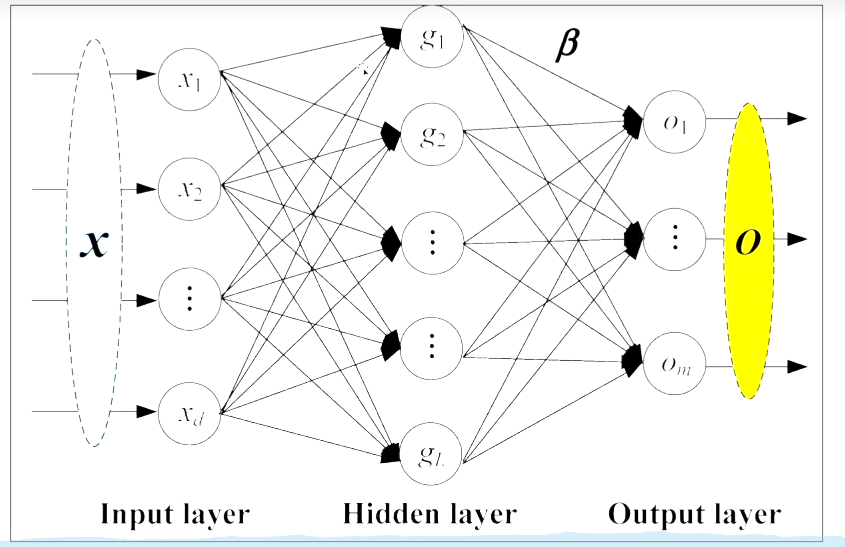

In [16]:
from torch.nn import Linear

class MyLinear(nn.Module):
    def __init__(self):
        super(MyLinear, self).__init__()
        self.linear1 = Linear(196608, 10)

    def forward(self, input):
        output = self.linear1(input)
        return output

mylinear = MyLinear()

for data in dataloader:
    imgs, targets = data
    print(imgs.shape)
    output = torch.flatten(imgs)
    print(output.shape)
    linear_output = mylinear(output)
    print(linear_output.shape)



torch.Size([64, 3, 32, 32])
torch.Size([196608])
torch.Size([10])
torch.Size([64, 3, 32, 32])
torch.Size([196608])
torch.Size([10])
torch.Size([64, 3, 32, 32])
torch.Size([196608])
torch.Size([10])
torch.Size([64, 3, 32, 32])
torch.Size([196608])
torch.Size([10])
torch.Size([64, 3, 32, 32])
torch.Size([196608])
torch.Size([10])
torch.Size([64, 3, 32, 32])
torch.Size([196608])
torch.Size([10])
torch.Size([64, 3, 32, 32])
torch.Size([196608])
torch.Size([10])
torch.Size([64, 3, 32, 32])
torch.Size([196608])
torch.Size([10])
torch.Size([64, 3, 32, 32])
torch.Size([196608])
torch.Size([10])
torch.Size([64, 3, 32, 32])
torch.Size([196608])
torch.Size([10])
torch.Size([64, 3, 32, 32])
torch.Size([196608])
torch.Size([10])
torch.Size([64, 3, 32, 32])
torch.Size([196608])
torch.Size([10])
torch.Size([64, 3, 32, 32])
torch.Size([196608])
torch.Size([10])
torch.Size([64, 3, 32, 32])
torch.Size([196608])
torch.Size([10])
torch.Size([64, 3, 32, 32])
torch.Size([196608])
torch.Size([10])
torch.Size

RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x49152 and 196608x10)